In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

In [2]:
df = pd.read_csv('musk_csv.csv')
df.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


In [3]:
data = df.drop(['ID', 'molecule_name','conformation_name'], axis=1)
data.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,46,-108,-60,-69,-117,49,38,-161,-8,5,...,-308,52,-7,39,126,156,-50,-112,96,1
1,41,-188,-145,22,-117,-6,57,-171,-39,-100,...,-59,-2,52,103,136,169,-61,-136,79,1
2,46,-194,-145,28,-117,73,57,-168,-39,-22,...,-134,-154,57,143,142,165,-67,-145,39,1
3,41,-188,-145,22,-117,-7,57,-170,-39,-99,...,-60,-4,52,104,136,168,-60,-135,80,1
4,41,-188,-145,22,-117,-7,57,-170,-39,-99,...,-60,-4,52,104,137,168,-60,-135,80,1


In [4]:
data.shape

(6598, 167)

In [5]:
data.isnull().sum()

f1       0
f2       0
f3       0
f4       0
f5       0
        ..
f163     0
f164     0
f165     0
f166     0
class    0
Length: 167, dtype: int64

In [6]:
data.dtypes

f1       int64
f2       int64
f3       int64
f4       int64
f5       int64
         ...  
f163     int64
f164     int64
f165     int64
f166     int64
class    int64
Length: 167, dtype: object

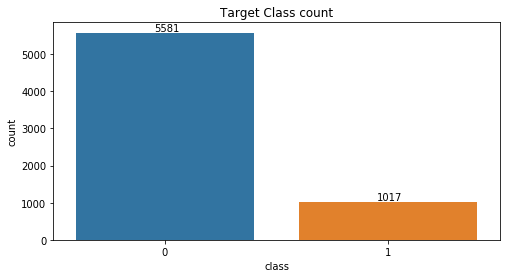

In [7]:
plt.figure(figsize = (8, 4))
plot = sns.countplot(data['class'])
plot.set_title("Target Class count")
for p in plot.patches:
    plot.annotate('{}'.format(p.get_height()), xy = (p.get_x() + 0.35, p.get_height() + 40))

In [8]:
data.describe()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
count,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,...,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000
mean,58.945135,-119.128524,-73.146560,-0.628372,-103.533495,18.359806,-14.108821,-1.858290,-86.003031,-44.495756,...,-184.798272,-75.795696,-26.073204,64.616702,112.037739,201.760230,-47.488330,-150.259927,41.770233,0.154138
std,53.249007,90.813375,67.956235,80.444617,64.387559,80.593655,115.315673,90.372537,108.326676,72.088903,...,107.819514,127.861271,69.727964,100.861935,72.835040,59.526751,55.069365,76.019023,94.116085,0.361108
min,-31.000000,-199.000000,-167.000000,-114.000000,-118.000000,-183.000000,-171.000000,-225.000000,-245.000000,-286.000000,...,-328.000000,-219.000000,-136.000000,-120.000000,-69.000000,73.000000,-289.000000,-428.000000,-471.000000,0.000000
25%,37.000000,-193.000000,-137.000000,-70.000000,-117.000000,-28.000000,-159.000000,-85.000000,-217.000000,-96.750000,...,-272.000000,-205.000000,-70.000000,-18.000000,71.000000,166.000000,-68.000000,-179.000000,-9.000000,0.000000
50%,44.000000,-149.000000,-99.000000,-25.000000,-117.000000,33.000000,27.000000,19.000000,-40.000000,-29.000000,...,-234.000000,-131.000000,-21.000000,61.500000,107.000000,191.000000,-60.000000,-150.000000,27.000000,0.000000
75%,53.000000,-95.000000,-19.000000,42.000000,-116.000000,74.000000,57.000000,61.000000,-21.000000,4.000000,...,-80.000000,52.000000,9.000000,149.000000,129.000000,215.000000,-45.000000,-120.000000,119.000000,0.000000
max,292.000000,95.000000,81.000000,161.000000,325.000000,200.000000,220.000000,320.000000,147.000000,231.000000,...,94.000000,179.000000,192.000000,411.000000,355.000000,625.000000,295.000000,168.000000,367.000000,1.000000


In [9]:
lable = data['class']
data_pca = data.drop(['class'], axis = 1) 
data_pca.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166
0,46,-108,-60,-69,-117,49,38,-161,-8,5,...,-244,-308,52,-7,39,126,156,-50,-112,96
1,41,-188,-145,22,-117,-6,57,-171,-39,-100,...,-235,-59,-2,52,103,136,169,-61,-136,79
2,46,-194,-145,28,-117,73,57,-168,-39,-22,...,-238,-134,-154,57,143,142,165,-67,-145,39
3,41,-188,-145,22,-117,-7,57,-170,-39,-99,...,-236,-60,-4,52,104,136,168,-60,-135,80
4,41,-188,-145,22,-117,-7,57,-170,-39,-99,...,-236,-60,-4,52,104,137,168,-60,-135,80


In [10]:
features = data.columns
# Separating out the features
x = data.loc[:, features].values
# Separating out the target
y = data.loc[:,['class']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [11]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component_1', 'principal component_2'])

In [12]:
finaldata = pd.concat([principalDf, df[['class']]], axis = 1)
finaldata.head()

,principal component_1,principal component_2,class
0,1.189404,9.518828,1
1,-3.309389,8.227524,1
2,-3.431082,7.864557,1
3,-3.313595,8.255922,1
4,-3.311826,8.257571,1


In [13]:
X = finaldata[['principal component_1','principal component_2']]
y = finaldata['class']

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [14]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=2, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [26]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, nb_epoch=200, validation_split=0.2, shuffle=True)

model.test_on_batch(X_test, y_test)
model.metrics_names

Train on 4222 samples, validate on 1056 samples
Epoch 1/200
4222/4222 [==============================] - 1s 193us/step - loss: 0.3123 - acc: 0.8903 - val_loss: 0.3184 - val_acc: 0.8778
Epoch 2/200
4222/4222 [==============================] - 0s 107us/step - loss: 0.3133 - acc: 0.8941 - val_loss: 0.3193 - val_acc: 0.8873
Epoch 3/200
4222/4222 [==============================] - 0s 117us/step - loss: 0.3132 - acc: 0.8918 - val_loss: 0.3201 - val_acc: 0.8854
Epoch 4/200
4222/4222 [==============================] - 0s 112us/step - loss: 0.3137 - acc: 0.8913 - val_loss: 0.3219 - val_acc: 0.8892
Epoch 5/200
4222/4222 [==============================] - 0s 104us/step - loss: 0.3120 - acc: 0.8918 - val_loss: 0.3200 - val_acc: 0.8920
Epoch 6/200
4222/4222 [==============================] - 0s 109us/step - loss: 0.3128 - acc: 0.8918 - val_loss: 0.3178 - val_acc: 0.8797
Epoch 7/200
4222/4222 [==============================] - 0s 108us/step - loss: 0.3123 - acc: 0.8918 - val_loss: 0.3209 - val_acc: 

4222/4222 [==============================] - 0s 96us/step - loss: 0.3116 - acc: 0.8918 - val_loss: 0.3196 - val_acc: 0.8883
Epoch 61/200
4222/4222 [==============================] - 0s 103us/step - loss: 0.3110 - acc: 0.8918 - val_loss: 0.3233 - val_acc: 0.8883
Epoch 62/200
4222/4222 [==============================] - 0s 96us/step - loss: 0.3121 - acc: 0.8937 - val_loss: 0.3186 - val_acc: 0.8807
Epoch 63/200
4222/4222 [==============================] - 0s 97us/step - loss: 0.3110 - acc: 0.8918 - val_loss: 0.3208 - val_acc: 0.8892
Epoch 64/200
4222/4222 [==============================] - 0s 101us/step - loss: 0.3118 - acc: 0.8937 - val_loss: 0.3188 - val_acc: 0.8807
Epoch 65/200
4222/4222 [==============================] - 0s 105us/step - loss: 0.3106 - acc: 0.8932 - val_loss: 0.3177 - val_acc: 0.8826
Epoch 66/200
4222/4222 [==============================] - 0s 102us/step - loss: 0.3110 - acc: 0.8903 - val_loss: 0.3187 - val_acc: 0.8883
Epoch 67/200
4222/4222 [==========================

4222/4222 [==============================] - 0s 101us/step - loss: 0.3095 - acc: 0.8925 - val_loss: 0.3212 - val_acc: 0.8864
Epoch 120/200
4222/4222 [==============================] - 0s 99us/step - loss: 0.3101 - acc: 0.8925 - val_loss: 0.3235 - val_acc: 0.8892
Epoch 121/200
4222/4222 [==============================] - 0s 101us/step - loss: 0.3094 - acc: 0.8908 - val_loss: 0.3205 - val_acc: 0.8873
Epoch 122/200
4222/4222 [==============================] - 0s 98us/step - loss: 0.3097 - acc: 0.8939 - val_loss: 0.3188 - val_acc: 0.8911
Epoch 123/200
4222/4222 [==============================] - 0s 101us/step - loss: 0.3107 - acc: 0.8918 - val_loss: 0.3172 - val_acc: 0.8797
Epoch 124/200
4222/4222 [==============================] - 0s 98us/step - loss: 0.3096 - acc: 0.8927 - val_loss: 0.3168 - val_acc: 0.8873
Epoch 125/200
4222/4222 [==============================] - 0s 99us/step - loss: 0.3104 - acc: 0.8925 - val_loss: 0.3191 - val_acc: 0.8883
Epoch 126/200
4222/4222 [====================

4222/4222 [==============================] - 0s 107us/step - loss: 0.3081 - acc: 0.8927 - val_loss: 0.3183 - val_acc: 0.8883
Epoch 179/200
4222/4222 [==============================] - 0s 101us/step - loss: 0.3086 - acc: 0.8910 - val_loss: 0.3171 - val_acc: 0.8864
Epoch 180/200
4222/4222 [==============================] - 0s 88us/step - loss: 0.3079 - acc: 0.8913 - val_loss: 0.3220 - val_acc: 0.8873
Epoch 181/200
4222/4222 [==============================] - 0s 104us/step - loss: 0.3083 - acc: 0.8913 - val_loss: 0.3171 - val_acc: 0.8826
Epoch 182/200
4222/4222 [==============================] - 0s 99us/step - loss: 0.3074 - acc: 0.8915 - val_loss: 0.3170 - val_acc: 0.8807
Epoch 183/200
4222/4222 [==============================] - 0s 91us/step - loss: 0.3079 - acc: 0.8908 - val_loss: 0.3190 - val_acc: 0.8854
Epoch 184/200
4222/4222 [==============================] - 0s 94us/step - loss: 0.3084 - acc: 0.8937 - val_loss: 0.3168 - val_acc: 0.8864
Epoch 185/200
4222/4222 [====================

['loss', 'acc']

In [29]:
# Getting accuracy score on testing data

model.evaluate(X_test,y_test)

1320/1320 [==============================] - 0s 52us/step


[0.32228201894146025, 0.8863636363636364]

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


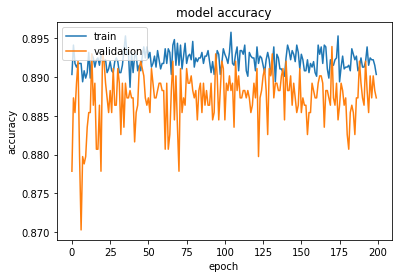

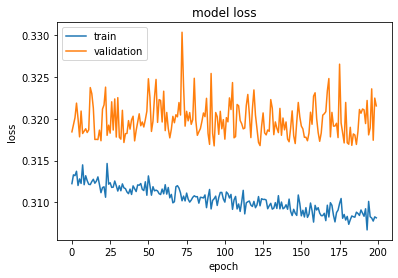

In [30]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [31]:
model.save_weights("model.h5")